# Decision Trees

In [1]:
# Importing neccessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Since Random Forest are built on decision trees, let's start by building decision trees first. Decision trees are extemely intuitive ways to classify or label objects: we simply ask a series of questions designed to zero-in on the classification. This can found more under the Decision Trees section.

Let's start by creating a single decision tree.

In [2]:
from sklearn.datasets import make_blobs

Scikit-learn is a Python library for machine learning that provides functions for generating a suite of test problems.

BLOB stands for Binary Large OBject. A blob is a data type that can store binary data. This is different than most other data types used in databases, such as integers, floating point numbers, characters, and strings, which store letters and numbers. BLOB is a large complex collection of binary data which is stored in Database. Basically BLOB is used to store media files like images, video and audio files. Due to its ability to store multimedia files it takes a huge disk space. Also length of BLOB may go upto 2, 147, 483, 647 characters. BLOB provides fast multimedia transfer. 

The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.

You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.

Information in this cell is taken from: 
https://www.geeksforgeeks.org/python-read-blob-object-in-python-using-wand-library/

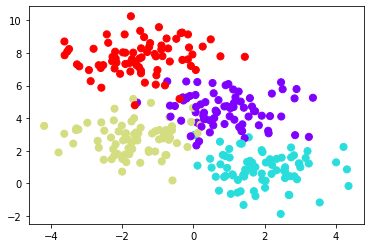

In [3]:
X, y = make_blobs(n_samples = 300, centers = 4,
                random_state = 0, cluster_std = 1.0)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'rainbow')

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative ceiterion, and at each level assign the label of the new region according to a majority vote of points within it. 

The below code is taken from the written of the book. It is only used for the purpose of plotting the decision tree plots. There is no need to understand it (Optional).

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact


def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)


def plot_tree_interactive(X, y):
    def interactive_tree(depth=5):
        clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
        visualize_tree(clf, X, y)

    return interact(interactive_tree, depth=[1, 5])


def randomized_tree_interactive(X, y):
    N = int(0.75 * X.shape[0])
    
    xlim = (X[:, 0].min(), X[:, 0].max())
    ylim = (X[:, 1].min(), X[:, 1].max())
    
    def fit_randomized_tree(random_state=0):
        clf = DecisionTreeClassifier(max_depth=15)
        i = np.arange(len(y))
        rng = np.random.RandomState(random_state)
        rng.shuffle(i)
        visualize_tree(clf, X[i[:N]], y[i[:N]], boundaries=False,
                       xlim=xlim, ylim=ylim)
    
    interact(fit_randomized_tree, random_state=[0, 100]);

This figure presents a visualization of the first four levels of a decision tree classifier for this data:

<ipython-input-4-e2780f058138>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-4-e2780f058138>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-4-e2780f058138>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-4-e2780f058138>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


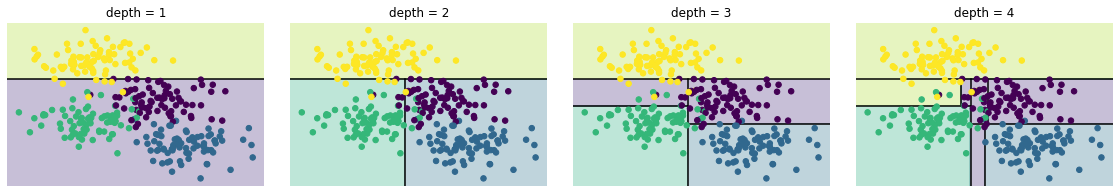

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
#from helpers_05_08 import visualize_tree
# helpers_05_08 is a library written specifically for visualizing trees by Jake VanderPlas(written of the book)

fig, ax= plt.subplots(1, 4, figsize = (16,3))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace=0.1 )


# We will be using these X and y until later!! 
X, y = make_blobs(n_samples = 300, centers = 4,
                 random_state = 0, cluster_std = 1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth = depth)
    visualize_tree(model, X, y, ax = axi)
    axi.set_title('depth = {0}'.format(depth))

fig.savefig('figure.png')

Note that after the first split, every point in the upper branch remains unchanged, so there is no need to further subdivide this branch. Except for nodes that contain all of one color, at each level every region is again split one of the two features.

This process of fitting a decision tree to our data can be done in Scikit-Learn with the DecisionTreeClassifier estimator:

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Below code block helps us visualize the output of the classifier:

In [7]:
def visualize_classifier(model, X, y, ax = None): 
    cmap = 'rainbow'
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = cmap,
              clim = (y.min(), y.max()), zorder = 3)
    
    ax.set_title('Decision Tree Visualizing')
    ax.set_ylabel('asdfasdf')
    ax.set_xlabel('asdfasdf')
    
    ax.axis('tight')
    ax.axis('off')
    xaxis = ax.get_xlim()
    yaxis = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xaxis, num = 100),
                        np.linspace(*yaxis, num = 100))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # Create a color to plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha = 0.3,
                           levels = np.arange(n_classes + 1) - 0.5,
                           cmap = cmap, clim=(y.min(), y.max()),
                           zorder = 1)
    ax.set(xlim = xaxis, ylim = yaxis)

<ipython-input-7-add6b132be0d>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, z, alpha = 0.3,


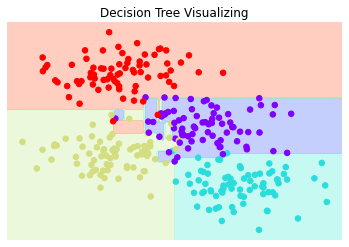

In [8]:
visualize_classifier(DecisionTreeClassifier(), X, y)

We can notice that these plots do not have axis assigned to them. This is because these plots are just for example purposes, so we do not need to worry about the axises.

The below code uses the plot_tree_interactive function to plot the decision tree with depth = 5.

In [9]:
plot_tree_interactive(X, y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function __main__.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

Notice that as the depth increases, we tend to get very strangely shaped classifications regions; for example, at the depth of 5, there is a tall and skinny purple region between yellow and blue regions. It is clear that this is less a result of true, intrinsic data distribution, and more a result of the particular sampling or moise properties of the data. That is, decision tree, even at only five levels deep, is clearly over-fitting our data.

## Decision Trees and Overfitting

Such over-fitting turns out to be a general property of decision trees: It is easy to go too deep in the tree, and thus to fit details of the particular data rather than the overall properties of the distributions they are drawn from. Another way to see this over-fitting is to look at models trained on different subsets of the data - for example, in this figure we train two different trees, each on half of the original data:

<ipython-input-4-e2780f058138>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,
<ipython-input-4-e2780f058138>:30: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


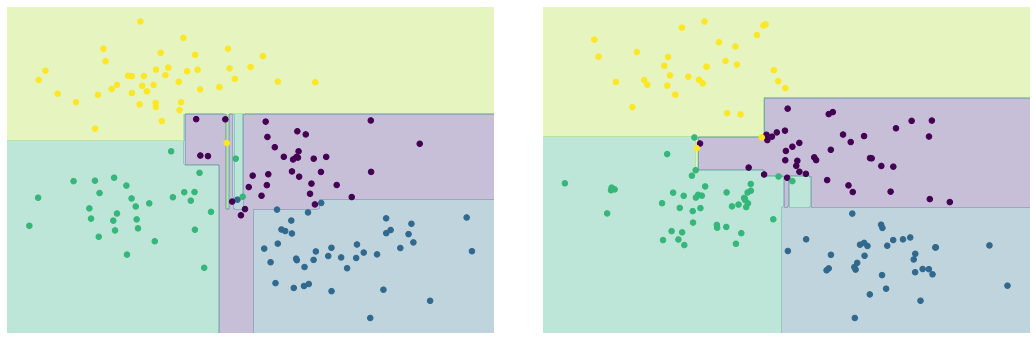

In [10]:
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)
visualize_tree(model, X[::2], y[::2], boundaries = False, ax = ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries = False, ax = ax[1])


It is clear that in some places, the two trees produce consistent results (e.g in the four corners), while in other places, the two trees give very different classifications (e.g. in the regions between any two clusters). The key observation is that the inconsistencies tend to happen where the classification is less certain, and thus by using information from both of these trees, we might come up with a better result! 

In [11]:
# This code uses the randomized_tree_interactive function
randomized_tree_interactive(X, y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

Just as using information from two trees improve our results, we might expect that using information from many trees would improve our results even further.